In [ ]:
!pip install transformers
!pip install accelerate -U


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import zipfile
import pandas as pd
import os

working_folder='/content/drive/MyDrive/AI/TransformerCode/E-commrece'

zip_file_path = working_folder+ 'extracted'

save_output = working_folder + "roberta_base_fine_tuned"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(working_folder)

csv_file_path = os.path.join(working_folder, 'ProductsReviews.Zip.csv')
df = pd.read_csv(csv_file_path)

df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/AI/TransformerCode/E-commreceextracted'

In [ ]:
import zipfile
import pandas as pd
import os

# Set working directory (should be a folder, not a .ipynb file)
working_folder = '/content/drive/MyDrive/AI/TransformerCode/E-commrece'

# Full path to the zip file
zip_file_path = os.path.join(working_folder, 'productreview.zip.zip')

# Directory to extract the contents
extract_to_folder = os.path.join(working_folder, 'extracted')

# Create extract folder if it doesn't exist
os.makedirs(extract_to_folder, exist_ok=True)

# Extract zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_folder)

# List the extracted files (optional, to find the CSV)
print("Extracted files:", os.listdir(extract_to_folder))

# Assuming there is only one CSV file
for file in os.listdir(extract_to_folder):
    if file.endswith('.csv'):
        csv_file_path = os.path.join(extract_to_folder, file)
        break

# Read CSV into DataFrame
df = pd.read_csv(csv_file_path)

# Show data
df.head()


Extracted files: ['productreview.zip.csv']


,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [ ]:
df=df[["reviews.text","sentiment"]]
df.head()

,reviews.text,sentiment
0,Purchased on Black FridayPros - Great Price (e...,Positive
1,I purchased two Amazon in Echo Plus and two do...,Positive
2,Just an average Alexa option. Does show a few ...,Neutral
3,"very good product. Exactly what I wanted, and ...",Positive
4,This is the 3rd one I've purchased. I've bough...,Positive


In [ ]:
df.shape

(4000, 2)

In [ ]:
counts=df['sentiment'].value_counts()
counts

,count
sentiment,
Positive,3749
Neutral,158
Negative,93


Text(0, 0.5, 'count')

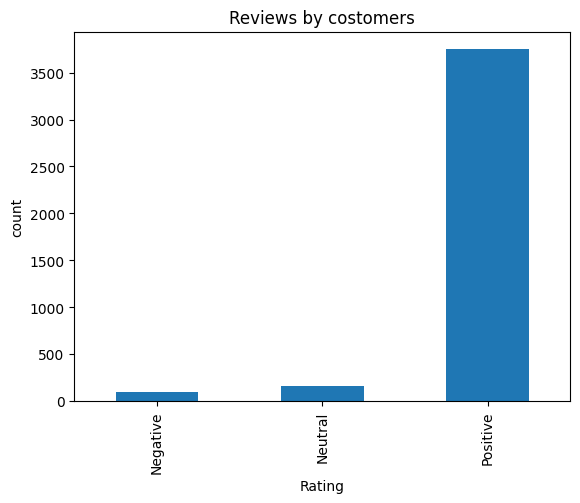

In [ ]:
plt=counts.sort_index().plot(kind='bar',title='Reviews by costomers')
plt.set_xlabel("Rating")
plt.set_ylabel("count")

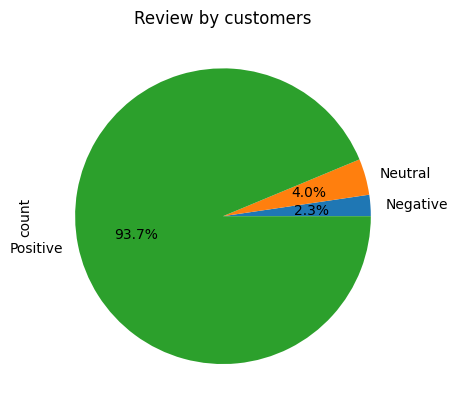

In [ ]:
plt=counts.sort_index().plot(kind='pie',autopct='%1.1f%%',title='Review by customers')

In [ ]:
def map_sentiment_to_class(sentiment):

    if sentiment=="Negative":
        return 0

    elif sentiment=="Neutral":
        return 1

    elif sentiment=="Positive":
        return 2

df.loc[:, "Class"] = df["sentiment"].apply(map_sentiment_to_class)

In [ ]:
df.head()

,reviews.text,sentiment,Class
0,Purchased on Black FridayPros - Great Price (e...,Positive,2
1,I purchased two Amazon in Echo Plus and two do...,Positive,2
2,Just an average Alexa option. Does show a few ...,Neutral,1
3,"very good product. Exactly what I wanted, and ...",Positive,2
4,This is the 3rd one I've purchased. I've bough...,Positive,2


In [ ]:
total_rows=300
class_rows=int(total_rows/3)
df_class_0 = df[df['Class'] == 0]
df_class_1 = df[df['Class'] == 1]
df_class_2 = df[df['Class'] == 2]


df_sample_0 = df_class_0.sample(n=min(class_rows, len(df_class_0)), random_state=42)
df_sample_1 = df_class_1.sample(n=min(class_rows, len(df_class_1)), random_state=42)
df_sample_2 = df_class_2.sample(n=min(class_rows, len(df_class_2)), random_state=42)


df_final = pd.concat([df_sample_0, df_sample_1, df_sample_2])

[]

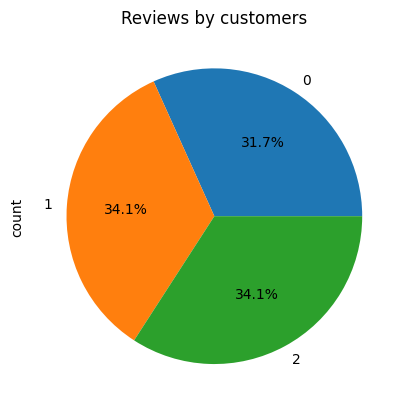

In [ ]:
counts=df_final['Class'].value_counts()

plt = counts.sort_index().plot(kind='pie', autopct='%1.1f%%', title="Reviews by customers")
plt.plot()

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def get_accuracy_pt(model, tokenizer, df_param):

    df=df_param.copy()
    df["PredClass"] = 0

    for index, row in df.iterrows():

        sentence = row["reviews.text"]

        tokenized_input = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=512)

        output = model(**tokenized_input)

        logits = output.logits

        predicted_class = torch.argmax(logits).item()

        df.at[index, "PredClass"] = predicted_class

    correct_predictions = (df["Class"] == df["PredClass"]).sum()

    total_predictions = len(df)

    accuracy = correct_predictions / total_predictions
    return round(100*accuracy,2)

In [ ]:
from transformers import Trainer, TrainingArguments

from sklearn.metrics import accuracy_score

texts = df_final["reviews.text"].tolist()

labels = df_final["Class"].tolist()

from sklearn.model_selection import train_test_split

texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, stratify=labels)

tokenized_texts_train = tokenizer(texts_train, return_tensors="pt", padding=True, truncation=True, max_length=512)

tokenized_texts_test = tokenizer(texts_test, return_tensors="pt", padding=True, truncation=True, max_length=512)


labels_train = torch.tensor(labels_train)
labels_test = torch.tensor(labels_test)


train_dataset = []
for i in range(len(tokenized_texts_train["input_ids"])):
    input_ids = tokenized_texts_train["input_ids"][i]
    attention_mask = tokenized_texts_train["attention_mask"][i]
    label = labels_train[i].item()
    train_dataset.append({'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': label})


test_dataset = []
for i in range(len(tokenized_texts_test["input_ids"])):
    input_ids = tokenized_texts_test["input_ids"][i]
    attention_mask = tokenized_texts_test["attention_mask"][i]
    label = labels_test[i].item()
    test_dataset.append({'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': label})


training_args = TrainingArguments(
    output_dir=save_output,
    num_train_epochs=8,
    per_device_train_batch_size=2,
    eval_strategy="epoch",
    report_to="none"
)

def compute_metrics(p):

    preds = p.predictions.argmax(-1)

    accuracy = accuracy_score(p.label_ids, preds)

    return {"accuracy": accuracy}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    processing_class=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

NameError: name 'save_output' is not defined

In [20]:
model.to('cpu')
all_accuracy=get_accuracy_pt(model,tokenizer,df_final)
print(f'all accuracy:{all_accuracy}')

all accuracy:31.74


In [ ]:
model.save_pretrained(save_output)
tokenizer.save_pretrained(sve_output)

NameError: name 'save_output' is not defined